In [21]:
import pandas as pd
import numpy as np
from numpy import random

In [22]:
df=pd.read_csv('Housing.csv')
#print(df.head())

data = df.sample(n=500)
data.replace('unfurnished', 0, inplace=True)
data.replace('furnished', 1, inplace=True)
data.replace('semi-furnished', 0.5, inplace=True)
data.replace('yes', 1, inplace=True)
data.replace('no', 0, inplace=True)


input = data[data.columns[1:]].values
output = data[data.columns[0]].values

#print(input)
#print(max(input.T[0]))
input.T[0] = input.T[0]/16200
input.T[1] = input.T[1]/4
input.T[2] = input.T[1]/4
input.T[3] = input.T[1]/4
print(input)

#output = (output)/7000000
output = (output)/13300000
print(output)

[[0.27160494 1.         0.25       ... 2.         1.         0.5       ]
 [0.37037037 1.         0.25       ... 1.         0.         1.        ]
 [0.18518519 0.5        0.125      ... 0.         0.         0.5       ]
 ...
 [0.39197531 0.75       0.1875     ... 0.         0.         1.        ]
 [0.35975309 1.         0.25       ... 0.         0.         0.5       ]
 [0.26666667 0.75       0.1875     ... 2.         1.         1.        ]]
[0.41842105 0.55263158 0.22263158 0.73684211 0.39473684 0.39210526
 0.63157895 0.41052632 0.37263158 0.22105263 0.34210526 0.32105263
 0.21315789 0.34736842 0.44210526 0.23421053 0.35263158 0.54210526
 0.40526316 0.41526316 0.23421053 0.20526316 0.35263158 0.44157895
 0.44210526 0.47368421 0.37368421 0.48947368 0.55789474 0.44736842
 0.2        0.36842105 0.27894737 0.23526316 0.26315789 0.23684211
 0.425      0.18684211 0.27368421 0.36315789 0.37631579 0.28421053
 0.29210526 0.45263158 0.25052632 0.25263158 0.53684211 0.27631579
 0.64210526 0.358421

C:\Users\Asus\AppData\Local\Temp\ipykernel_29480\445191414.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('semi-furnished', 0.5, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29480\445191414.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('no', 0, inplace=True)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(input, output, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(350, 12) (350,)
(75, 12) (75,)


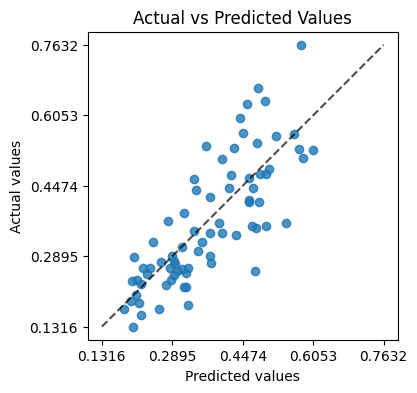

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt

model = LinearRegression(positive=False)
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(4,4))
PredictionErrorDisplay.from_estimator(model, X_test, y_test, ax=ax, kind="actual_vs_predicted")
#residual_vs_predicted
#actual_vs_predicted

ax.set_title("Actual vs Predicted Values")
plt.show()

For the real price, multiply the values of the obove graph by 13300000

Validation MSE: 0.0099
Test MSE: 0.0072
Validation MAPE: 19.5259
Test MAPE: 19.8578


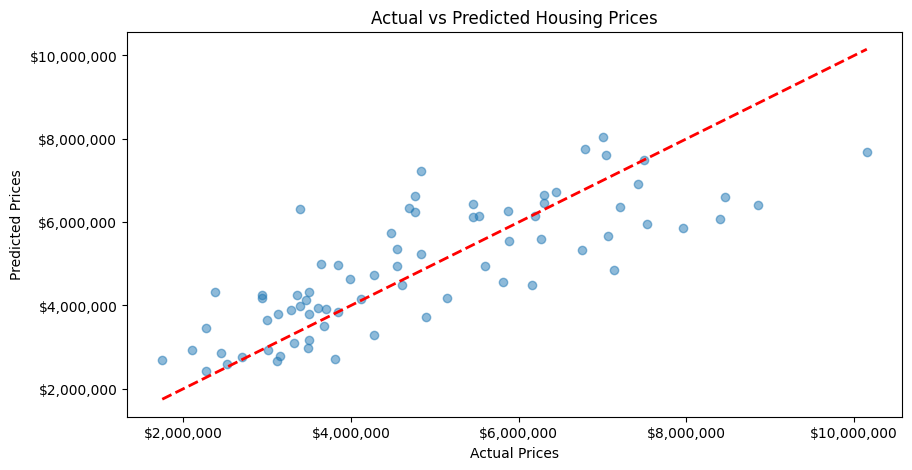

In [25]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

def evaluate_model2(model, X, y):
    y_pred = model.predict(X)
    mape = mean_absolute_percentage_error(y, y_pred)*100
    return mape


mse_val = evaluate_model(model, X_val, y_val)
mse_test = evaluate_model(model, X_test, y_test)

mape_val = evaluate_model2(model, X_val, y_val)
mape_test = evaluate_model2(model, X_test, y_test)

print(f'Validation MSE: {mse_val:.4f}')
print(f'Test MSE: {mse_test:.4f}')

print(f'Validation MAPE: {mape_val:.4f}')
print(f'Test MAPE: {mape_test:.4f}')

y_pred = model.predict(X_test)*13300000
y_actual = y_test*13300000
plt.figure(figsize=(10,5))
plt.scatter(y_actual, y_pred, alpha=0.5)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()